Con uso de la librería `pandas`, importamos la base de datos `A1.3 NASA` para iniciar con nuestro análisis. A continuación, se muestran las dimensiones del DataFrame y las primeras 15 filas de datos registradas.

In [2]:
import pandas as pd

df = pd.read_csv("A1.3 NASA.csv")

print(df.shape)

print(df.columns)

print(df.head(15))

(1503, 6)
Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       1600

Utilizando la función `sample` de `pandas`, dividimos la base de datos en dos subconjuntos, `train` (70% de los datos) y `test` (30% restante). A continuación, se muestran las dimensiones de cada conjunto y las primeras filas del subconjunto de la parte de entrenamiento.

In [3]:
train = df.sample(frac = 0.7)

test = df.drop(train.index)

print("Train", train.shape)

print("Test", test.shape)

print(train.head())

Train (1052, 6)
Test (451, 6)
      frecuencia  angulo  longitud  velocidad   espesor  presion
1286        2000     0.0    0.1016       31.7  0.001501  133.153
549         2500     5.4    0.1524       71.3  0.004012  127.591
1336        1600     3.3    0.1016       31.7  0.002514  133.402
661          200     9.9    0.1524       39.6  0.023333  127.315
631          315     9.9    0.1524       71.3  0.019300  135.459


Con apoyo de la librería `statsmodels`, entrenamos un modelo de regresión lineal múltiple. Para entrenar el modelo, asignamos a la variable `X` las cinco columnas de variables de nuestro conjunto de datos, eliminando la columna `presion` con `axis=1` (ya que `axis=1` indica que queremos operar sobre columnas; `axis=0` sería para filas). Estas serán nuestras variables predictoras. Por otro lado, a la variable `Y` le asignamos únicamente la columna `presion`, que será la variable dependiente o respuesta que queremos predecir.  Despues utilizamos el método `.fit()` del modelo OLS (Mínimos Cuadrados Ordinarios) para estimar los coeficientes de Bm que mejor ajustan la relación entre `X` y `Y`. Luego, imprimimos en consola un resumen del modelo, que incluye los coeficientes estimados, el error estándar, el estadístico t y los p-values de cada variable. Ya que algunos p-values aparecen como `0.000`, también mostramos sus valores exactos mediante el atributo `pvalues`.


In [5]:
import statsmodels.api as sm
# Aqui lo que queremos es predecir la presion en relacion a las otras 5 variables. Que nos den las 5 variables y nosotros predigamos el valor de la pregion
# Asignamos a X el valor de todas las variables MENOS calidad
# en pandas el axis representa filas[0] o columas[1]
# Como lo que queremos predecir, es decir, que nuestro output sea la presion, le damos ese valor a la Y
x = train.drop("presion", axis = 1)

y = train.presion

model = sm.OLS(y, sm.add_constant(x))

results = model.fit()
#El método .fit() estima los coeficientes $\beta_0, \beta_1, \beta_2, …$ que mejor ajustan la relación entre X y Y.

print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     216.4
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          1.57e-158
Time:                        23:38:49   Log-Likelihood:                -3132.9
No. Observations:                1052   AIC:                             6278.
Df Residuals:                    1046   BIC:                             6307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.3216      0.646    204.939      0.0

Ahora con los datos obtenidos en el resumen, podemos observar que los valores de p de nuestras variables son 0.000, pero para averiguar su valor exacto usamos la funcion de `pvalue`. Posterior a esto, dada la regla de que si el valor de p es menor a 0.05, se considera que la variable de entrada tiene relacion con la variable de salida, que en este caso se puede decir que todas las variables tenen una relacion con nuestra salida. Sin embargo, para encontrar a la variable que mas afecta neustro resultado nos basaremos en los coeficientes individuales de cada variable. Este coeficiente es el numero que acompaña a la X, o sea, la BN para cada caso. Esta BN indica que tanto aumenta o disminuye por cada unidad. Tomando esto a consideracion, podemos observar que el espesor es la variable con el valor absoluto más grande, o sea, es la que mas afecta nuestro resultado final. Esto se puede representar como que por cada singular aumento en la unidad de espersor, la presion disminuye en 157 unidades aproximadamente.

Ahora se calculara el `Residual Standard Error (RSE)`, que mide el error promedio de las predicciones del modelo. Para el conjunto de entrenamiento, usamos el atributo `scale` del objeto `results` y sacamos la raíz cuadrada. Despues, para el conjunto de validación, lo calculamos manualmente como la raíz cuadrada de la suma de los errores al cuadrado dividida entre el número de observaciones menos el número de predictores menos uno. Tambien se calcula la `R² (coeficiente de determinación)`, que indica la que tanto varia la repuesta que el modelo explica. Para entrenamiento, se obtiene directamente con `results.rsquared` y para validacion se calcula como 1 - RSS / TSS, donde RSS es la suma de los residuos al cuadrado y TSS es la suma total de cuadrados respecto a la media. Una vez calculado, podemos determinar que una R² cercana a 1 y un RSE significan que el modelo ajusta bien los datos. Primero mencionar que al trabajar con datos aleatorios de la base de datos, los resultados pueden variar un poco, pero en este caso los valores de R²son similares a 0.50, lo que se puede interpretar como que explican aproximadamente la mitad de la variabilidad de la presión sonora. Y sobre el RSE de testing es menor que el de entrenamiento, que va de la mano con un error promedio mas bajo.

In [28]:
import numpy as np
# Entrenamiento
RSE_train = np.sqrt(results.scale)
print("RSE entrenamiento:", RSE_train)
R2_train = results.rsquared
print("R2 entrenamiento:", R2_train)

# Validacion
xNew = sm.add_constant(xNew)
XTest = test.drop('presion', axis = 1)
yhatTest = results.predict(sm.add_constant(XTest))
YTest = test.presion
RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)
nTest = XTest.shape[0]
mTest = XTest.shape[1]
nTest = x.shape[0]
mTest = x.shape[1]
RSETest = np.sqrt(RSSTest/(nTest-mTest-1))
R2Test = 1 - RSSTest / TSSTest
print("RSE Testear=", RSETest)
print("R2 Testear=", R2Test)

RSE entrenamiento: 4.768036261655334
R2 entrenamiento: 0.5084724786426484
RSE Testear= 3.231320072400469
R2 Testear= 0.5255023558181748


Por ultimo, podemos ver la relacion entre los valores reales se la presion sonora, o sea, aquellos que no se usaron para entrenar al modelo y se apartaron para precisamente poner a prueba el modelo (YTest) y los valores estimados por el propio modelo (YhatTest). La grafica muestra puntos azules como las observaciones, la linea roja representa la relacion perfecta, donde el valor dado por el modelo, seria el mismo que el real. A simplevista se podria decir que si, los puntos se concentran cerca de la linea roja, lo que se puede deicr que el modelo predice razonablemente bien lo valodes de presion sonora, sin embargo, no hay que dejar de lado esos puntos que si estan mas alejados de dicha linea. En general, podemos decir que el modelo tiene un desempeño decente y da una evaluacion cualitativa del ajuste del modelo.

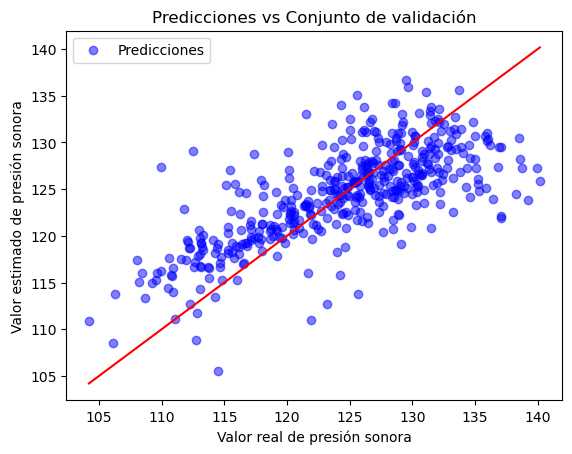

In [27]:
import matplotlib.pyplot as plt

# Gráfica de dispersión
plt.scatter(YTest, yhatTest, color='blue', alpha=0.5, label='Predicciones')
plt.plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], color='red') 
plt.xlabel("Valor real de presión sonora")
plt.ylabel("Valor estimado de presión sonora")
plt.title("Predicciones vs Conjunto de validación")
plt.legend()
plt.show()